### การเตรียมข้อมูล

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Shape of the image array: (224, 224, 3)
Min value: -0.7568627595901489
Max value: 1.0
Mean: 0.13240087032318115
Standard deviation: 0.294062077999115


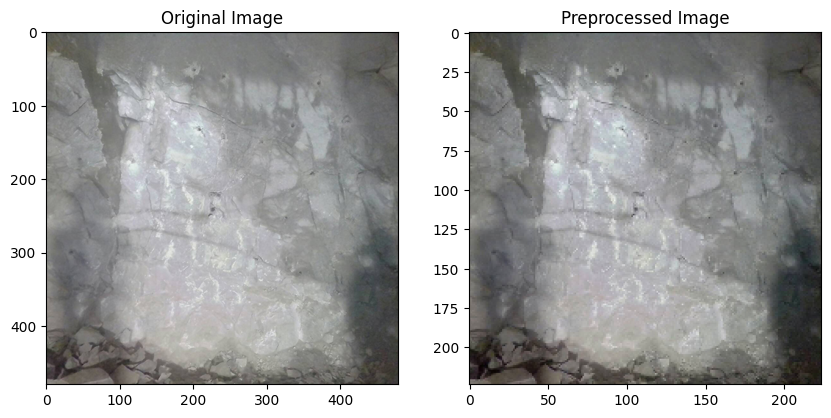

In [2]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from transformers import BertTokenizer
import tensorflow as tf

# ฟังก์ชันสำหรับโหลดและประมวลผลรูปภาพ
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array

# ฟังก์ชันสำหรับสร้าง image path
def get_image_path(filename, base_path):
    if 1 <= int(filename) <= 292:
        return os.path.join(base_path, 'II', f"{filename}.jpg")
    elif 293 <= int(filename) <= 523:
        return os.path.join(base_path, 'III', f"{filename}.jpg")
    elif 524 <= int(filename) <= 593:
        return os.path.join(base_path, 'IV', f"{filename}.jpg")
    else:
        raise ValueError(f"Invalid filename: {filename}")

# โหลดข้อมูล
df = pd.read_csv('/content/drive/MyDrive/work_space_tunnel/Data_PyMu (csv2).csv')

base_image_path = '/content/drive/MyDrive/work_space_tunnel'

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# สร้าง list เพื่อเก็บข้อมูล
image_data = []
text_data = []
labels = []

# BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_length = 512

# วนลูปผ่านแต่ละแถวใน DataFrame
for index, row in df.iterrows():
    filename = str(row['filename'])

    # โหลดและประมวลผลรูปภาพ
    image_path = get_image_path(filename, base_image_path)
    img_array = load_and_preprocess_image(image_path)
    image_data.append(img_array)

    # ประมวลผลข้อความ
    text = ' '.join(row[['select1', 'select2', 'select4', 'select5']].astype(str))
    encoded_text = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='tf'
    )
    text_data.append({
        'input_ids': encoded_text['input_ids'][0],
        'attention_mask': encoded_text['attention_mask'][0]
    })

    # เก็บ label
    labels.append(row['class'])

# แปลงเป็น numpy array
image_data = np.array(image_data)
input_ids = np.array([item['input_ids'] for item in text_data])
attention_masks = np.array([item['attention_mask'] for item in text_data])

import matplotlib.pyplot as plt
import numpy as np

def inspect_image(image_path, target_size=(224, 224)):
    # โหลดและประมวลผลรูปภาพ
    img_array = load_and_preprocess_image(image_path, target_size)

    # ตรวจสอบขนาดของ array
    print(f"Shape of the image array: {img_array.shape}")

    # ตรวจสอบค่าต่ำสุดและสูงสุดหลังจาก preprocessing
    print(f"Min value: {np.min(img_array)}")
    print(f"Max value: {np.max(img_array)}")

    # คำนวณและแสดงค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐาน
    print(f"Mean: {np.mean(img_array)}")
    print(f"Standard deviation: {np.std(img_array)}")

    # แสดงรูปภาพ
    plt.figure(figsize=(10, 5))

    # รูปภาพต้นฉบับ
    plt.subplot(1, 2, 1)
    original_img = plt.imread(image_path)
    plt.imshow(original_img)
    plt.title("Original Image")

    # รูปภาพหลัง preprocessing
    plt.subplot(1, 2, 2)
    # ปรับ scale กลับมาให้แสดงผลได้
    img_display = (img_array - np.min(img_array)) / (np.max(img_array) - np.min(img_array))
    plt.imshow(img_display)
    plt.title("Preprocessed Image")

    plt.show()

# ใช้งานฟังก์ชัน
image_path = get_image_path("1", base_image_path)  # เปลี่ยนเป็นรูปภาพที่ต้องการตรวจสอบ
inspect_image(image_path)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
print(f"Input IDs shape: {encoded_text['input_ids'].shape}")
print(f"Attention Mask shape: {encoded_text['attention_mask'].shape}")
print("Decoded text:", tokenizer.decode(encoded_text['input_ids'][0]))
original_length = len(tokenizer.encode(text))
encoded_length = len(encoded_text['input_ids'][0])
print(f"Original length: {original_length}, Encoded length: {encoded_length}")
print("First token:", tokenizer.decode(encoded_text['input_ids'][0][0]))
print("Last token:", tokenizer.decode(encoded_text['input_ids'][0][-1]))

Input IDs shape: (1, 512)
Attention Mask shape: (1, 512)
Decoded text: [CLS] tunnel entrance and exit map number : rt - gm - mt - 01 - 0289kilometerslength : 0 + 593. 50land survey certificate no. [UNK]. 21 / 2559 ( land department ) geological mapping ( geological survey ) monk : tunnel axis bearing in the tunnel ( tunnel axis bearing ) … … ….. 0 ( north - south ) … … … …. earth covers the tunnel : 85. 91 m start : 0 + 592. 50 end : 0 + 593. 50 ast time : 15 : 30 applying time : 18 : 00 date : 21 / 10 / 2561 symbols infilling weathering con. soft < 5 mmmoderately weathered. dippingsoft < 5 mmmoderately weathered. wetsoft < 5 mmhighly weathered. dippingj6smoothj340 - 60° / 210 - 230 60 - 200 mm0. 1 - 1 mm1 - 3 m50 - 70° / 170 - 1900. 2 - 0. 6 m1 - 3 m0. 1 - 1 mmsmoothroughnessscontinuity type dip / dip directionspacingpersistenceaperturesmoothj260 - 70° / 110 - 130 60 - 200 mm3 - 4 m0. 1 - 1 mm description of limestone, gray to light gray, fibrous texture showing arrangement, composed 

In [4]:
# Label Encoder
label_encoder = LabelEncoder()
labels_int  = label_encoder.fit_transform(labels)
labels_onehot  = to_categorical(labels_int)
labels = np.array(labels_onehot)
labels = labels.astype(int)

# คำนวณ class weights
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(labels_int),
                                     y=labels_int)
class_weights_dict = dict(enumerate(class_weights))

print(class_weights_dict)

{0: 0.6769406392694064, 1: 0.8556998556998557, 2: 2.823809523809524}


In [5]:
# สร้าง tf.data.Dataset
dataset = tf.data.Dataset.from_tensor_slices(({
    'image': image_data,
    'input_ids': input_ids,
    'attention_mask': attention_masks
}, labels))

dataset = dataset.shuffle(buffer_size=len(dataset))

# แบ่ง dataset เป็น train, validation, และ test
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_ds = dataset.take(train_size)
val_ds = dataset.skip(train_size).take(val_size)
test_ds = dataset.skip(train_size + val_size)

batch_size = 32
train_ds = train_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)
test_ds = test_ds.batch(batch_size)

print("Data preparation completed.")
print(f"Train size: {train_size}")
print(f"Validation size: {val_size}")
print(f"Test size: {test_size}")

Data preparation completed.
Train size: 415
Validation size: 88
Test size: 90


In [8]:
train_ds

<_BatchDataset element_spec=({'image': TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), 'input_ids': TensorSpec(shape=(None, 512), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, 512), dtype=tf.int32, name=None)}, TensorSpec(shape=(None, 3), dtype=tf.int64, name=None))>

### Model

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, Model, regularizers
from tensorflow.keras.applications import InceptionResNetV2
from transformers import TFBertModel
from tensorflow.keras.metrics import F1Score

# สร้าง Custom Layer สำหรับ BERT

class BertLayer(tf.keras.layers.Layer):
    def __init__(self, bert_model_name='bert-base-uncased', trainable=True, **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        self.bert_model_name = bert_model_name
        self.trainable = trainable
        self.bert = TFBertModel.from_pretrained(self.bert_model_name)
        self.bert.trainable = self.trainable

    def build(self, input_shape):
        # This ensures the layer's weights are created
        self.bert.build(input_shape)
        super(BertLayer, self).build(input_shape)

    def call(self, inputs):
        input_ids, attention_mask = inputs
        outputs = self.bert(input_ids, attention_mask=attention_mask, return_dict=True)
        return outputs.last_hidden_state

    def compute_output_shape(self, input_shape):
        return (input_shape[0][0], input_shape[0][1], self.bert.config.hidden_size)

    def get_config(self):
        config = super().get_config()
        config.update({
            "bert_model_name": self.bert_model_name,
            "trainable": self.trainable,
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)





def simplified_multimodal_model(img_height, img_width, max_length, num_classes):
    # Image processing
    image_input = layers.Input(shape=(img_height, img_width, 3), name='image')
    base_model = InceptionResNetV2(weights=None, include_top=False, input_shape=(img_height, img_width, 3))
    base_model.trainable = True
    x_img = base_model(image_input)
    x_img = layers.GlobalAveragePooling2D()(x_img)
    x_img = layers.Dense(64, activation='relu')(x_img)

    # Text processing
    input_ids = layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
    attention_mask = layers.Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')
    bert_layer = BertLayer()
    bert_outputs = bert_layer([input_ids, attention_mask])
    cls_token = layers.Lambda(lambda x: x[:, 0, :])(bert_outputs)
    x_text = layers.Dense(64, activation='relu')(cls_token)

    # Combine features
    combined_features = layers.Concatenate()([x_img, x_text])
    x = layers.Dense(32, activation='relu')(combined_features)
    x = layers.Dropout(0.15)(x)
    output = layers.Dense(num_classes, activation='softmax')(x)

    model = Model(
        inputs={'image': image_input, 'input_ids': input_ids, 'attention_mask': attention_mask},
        outputs=output,
        name='simplified_multimodal_model'
    )
    return model

# สร้างโมเดล
img_height, img_width = 224, 224
max_length = 512
num_classes = 3

model = simplified_multimodal_model(img_height, img_width, max_length, num_classes)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', F1Score()]
)
model.summary()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "simplified_multimodal_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image (InputLayer)        │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_ids (InputLayer)    │ (None, 512)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_mask            │ (None, 512)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ inception_resnet_v2       │ (None, 5, 5, 1536)     │     54,336,736 │ image[0][0]            │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bert_layer (BertLayer)    │ (None, 512, 768)       │              0 │ input_ids[0][0],       │
│                           │                        │                │ attention_mask[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 1536)           │              0 │ inception_resnet_v2[0… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 768)            │              0 │ bert_layer[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │         98,368 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │         49,216 │ lambda[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 128)            │              0 │ dense[0][0],           │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 32)             │          4,128 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 32)             │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 3)              │             99 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 54,488,547 (207.86 MB)

 Trainable params: 54,428,003 (207.63 MB)

 Non-trainable params: 60,544 (236.50 KB)

In [35]:
import numpy as np
from tensorflow.keras.callbacks import Callback

class SaveBestValidationAccuracy(Callback):
    def __init__(self, filepath):
        super().__init__()
        self.filepath = filepath
        self.best_val_accuracy = 0

    def on_epoch_end(self, epoch, logs=None):
        current_val_accuracy = logs.get('val_accuracy')
        if current_val_accuracy > self.best_val_accuracy:
            self.best_val_accuracy = current_val_accuracy
            self.model.save_weights(self.filepath)
            print(f"\nSaved model with best validation accuracy: {self.best_val_accuracy:.4f}")

# Usage:
filepath = 'best_model.weights.h5'
save_best_callback = SaveBestValidationAccuracy(filepath)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=80,
    batch_size=batch_size,
    class_weight=class_weights_dict,
    callbacks=[save_best_callback]
)

Epoch 1/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5066 - f1_score: 0.4751 - loss: 0.9899   
Saved model with best validation accuracy: 0.5455
13/13 ━━━━━━━━━━━━━━━━━━━━ 299s 10s/step - accuracy: 0.5108 - f1_score: 0.4792 - loss: 0.9853 - val_accuracy: 0.5455 - val_f1_score: 0.2353 - val_loss: 1.3990
Epoch 2/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 625ms/step - accuracy: 0.6805 - f1_score: 0.6492 - loss: 0.7514 - val_accuracy: 0.1705 - val_f1_score: 0.0971 - val_loss: 58.6578
Epoch 3/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 620ms/step - accuracy: 0.7101 - f1_score: 0.6763 - loss: 0.6227 - val_accuracy: 0.1136 - val_f1_score: 0.0680 - val_loss: 41.0887
Epoch 4/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 620ms/step - accuracy: 0.7548 - f1_score: 0.7172 - loss: 0.6093 - val_accuracy: 0.1591 - val_f1_score: 0.0915 - val_loss: 3.7825
Epoch 5/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 621ms/step - accuracy: 0.7446 - f1_score: 0.7203 - loss: 0.6309 - val_accuracy: 0.1705 - val_f1_score: 0.1726 - val_loss: 2.2493
Epoc

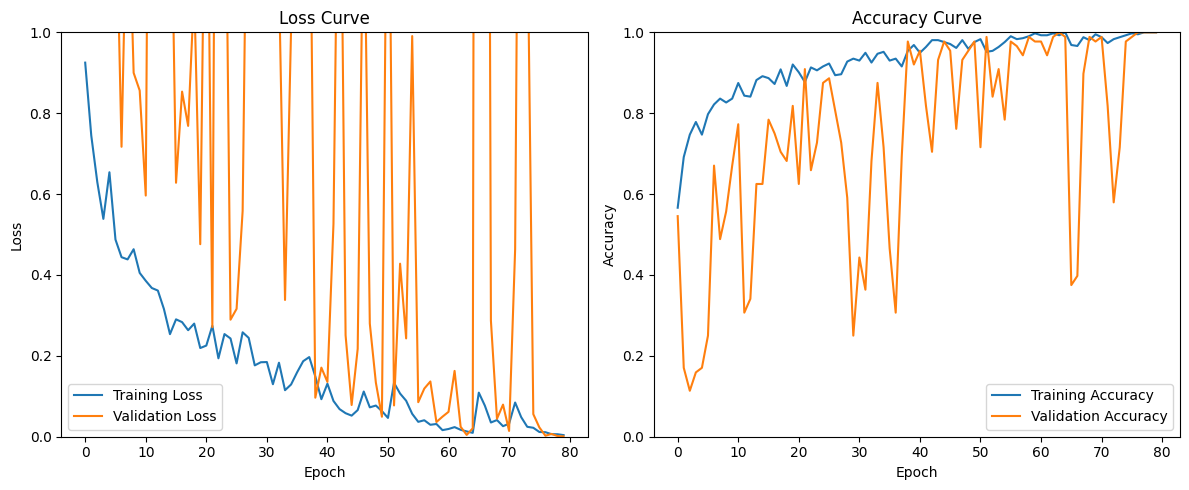

In [36]:
import matplotlib.pyplot as plt

# กราฟ Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])  # กำหนดค่าสูงสุดของแกน y เป็น 1
plt.legend()

# กราฟ Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # กำหนดค่าสูงสุดของแกน y เป็น 1
plt.legend()

plt.tight_layout()
plt.show()


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step
Weighted F1-score: 1.0000


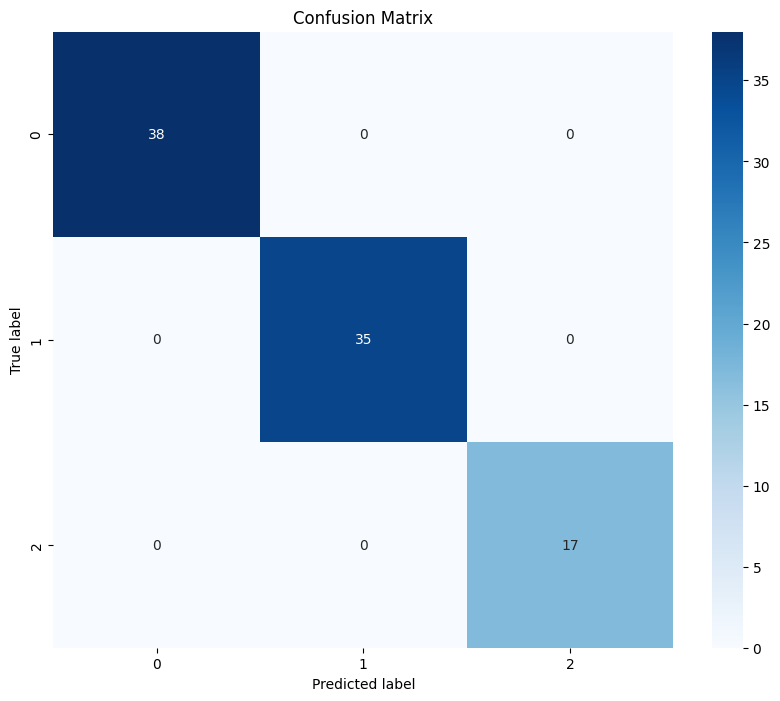

Confusion Matrix:
[[38  0  0]
 [ 0 35  0]
 [ 0  0 17]]


In [37]:
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.models import load_model

def evaluate_model(model, test_ds):
    # Get predictions
    y_pred = []
    y_true = []
    for batch in test_ds:
        batch_pred = model.predict(batch[0])
        y_pred.extend(np.argmax(batch_pred, axis=1))
        y_true.extend(np.argmax(batch[1], axis=1))

    # Calculate F1-score
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"Weighted F1-score: {f1:.4f}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    return f1, cm


# Load the best model, providing custom objects
best_model_path = 'best_model.weights.h5'
custom_objects = {'BertLayer': BertLayer, 'TFBertModel': TFBertModel}  # Add TFBertModel

# Recreate the model with the same architecture used during training
model = simplified_multimodal_model(img_height, img_width, max_length, num_classes)

# Compile the model before loading weights
model.compile(
    optimizer='adam',  # Use the same optimizer as during training
    loss='categorical_crossentropy',  # Use the same loss function as during training
    metrics=['accuracy', F1Score()]
)

# Load the weights into the recreated model, providing custom objects
model.load_weights(best_model_path)

# Evaluate the model
f1_score, conf_matrix = evaluate_model(model, test_ds)
print("Confusion Matrix:")
print(conf_matrix)